# Instacart Market Basket Analysis - Kaggle

#### Problem Description

In [1]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
%matplotlib inline

In [2]:
#Read in Dataset
aisles_df=pd.read_csv(r"aisles.csv")
departments_df=pd.read_csv(r"departments.csv")
order_products_prior_df=pd.read_csv(r"order_products_prior.csv")
order_products_train_df=pd.read_csv(r"order_products_train.csv")
orders_df=pd.read_csv(r"orders.csv")
products_df=pd.read_csv(r"products.csv")

###### Describe Data

In [3]:
#Print data shapes
print("Aisles Dataset Shape : ",aisles_df.shape)
print("Departments Dataset Shape : ",departments_df.shape)
print("Order Products Prior Dataset Shape : ",order_products_prior_df.shape)
print("Order Products Train Dataset Shape : ",order_products_train_df.shape)
print("Orders Dataset Shape : ",orders_df.shape)
print("Products Dataset Shape : ",products_df.shape)

Aisles Dataset Shape :  (134, 2)
Departments Dataset Shape :  (21, 2)
Order Products Prior Dataset Shape :  (32434489, 4)
Order Products Train Dataset Shape :  (1384617, 4)
Orders Dataset Shape :  (3421083, 7)
Products Dataset Shape :  (49688, 4)


In [4]:
#Print data info
print("Aisles Dataset Info : ",aisles_df.info(),"\n","*"*25,"\n")
print("Departments Dataset Info : ",departments_df.info(),"\n","*"*25,"\n")
print("Products Dataset Info : ",products_df.info(),"\n","*"*25,"\n")
print("Order Products Prior Dataset Info : ",order_products_prior_df.info(),"\n","*"*25,"\n")
print("Order Products Train Dataset Info : ",order_products_train_df.info(),"\n","*"*25,"\n")
print("Orders Dataset Info : ",orders_df.info(),"\n","*"*25,"\n")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
aisle_id    134 non-null int64
aisle       134 non-null object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB
Aisles Dataset Info :  None 
 ************************* 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
department_id    21 non-null int64
department       21 non-null object
dtypes: int64(1), object(1)
memory usage: 416.0+ bytes
Departments Dataset Info :  None 
 ************************* 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49688 entries, 0 to 49687
Data columns (total 4 columns):
product_id       49688 non-null int64
product_name     49688 non-null object
aisle_id         49688 non-null int64
department_id    49688 non-null int64
dtypes: int64(3), object(1)
memory usage: 1.5+ MB
Products Dataset Info :  None 
 ************************* 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32434489 entr

###### Explore Datasets

In [5]:
aisles_df.head()

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [6]:
departments_df.head()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [7]:
order_products_prior_df.head()

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [8]:
order_products_train_df.head()

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


In [9]:
orders_df.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [10]:
products_df.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


###### How many unique departments, aisles and products are there in the dataset?

In [11]:
print("Departments: ",departments_df.department_id.size)
print("Aisles: ",aisles_df.aisle_id.size)
print("Products: ",products_df.product_id.size)

Departments:  21
Aisles:  134
Products:  49688


###### How many users in dataset?

In [12]:
orders_df.user_id.nunique()

206209

###### How many users is training and test set?

In [13]:
print("Users in training set: ",orders_df[orders_df.eval_set=='train'].user_id.nunique())
print("Users in test set: ",orders_df[orders_df.eval_set=='test'].user_id.nunique())

Users in training set:  131209
Users in test set:  75000


### Identify patterns in data

###### How many products per department, products per aisle?

In [14]:
#Join products_df with aisles_df and departments_df
products_df=pd.merge(products_df,aisles_df,on='aisle_id',how='left')
products_df=pd.merge(products_df,departments_df,on='department_id',how='left')

In [15]:
#Products per aisle
products_df.aisle.value_counts().head(10)

missing                 1258
candy chocolate         1246
ice cream ice           1091
vitamins supplements    1038
yogurt                  1026
chips pretzels           989
tea                      894
packaged cheese          891
frozen meals             880
cookies cakes            874
Name: aisle, dtype: int64

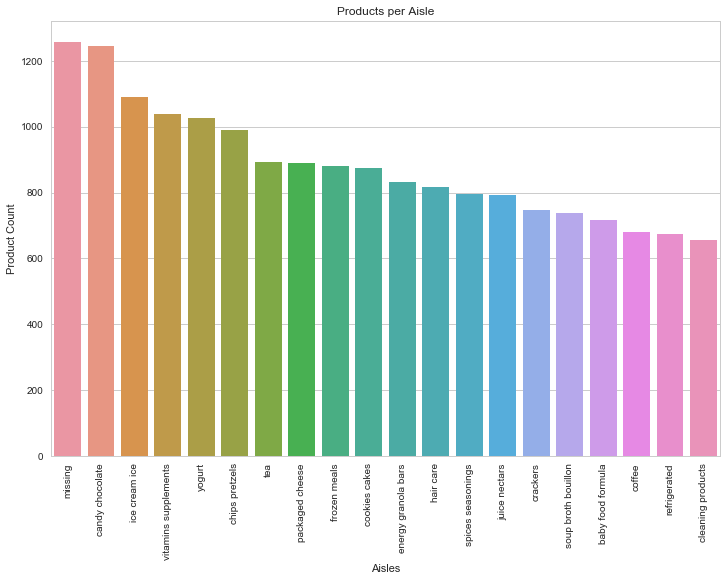

In [16]:
#Products per aisle
product_per_count = products_df['aisle'].value_counts().head(20)
plt.figure(figsize=(12,8))
sns.barplot(product_per_count.index, product_per_count.values)
plt.title("Products per Aisle")
plt.xlabel("Aisles")
plt.ylabel('Product Count')
plt.xticks(rotation='vertical')
plt.show()

In [17]:
#Products per department
products_df.department.value_counts().head(10)

personal care      6563
snacks             6264
pantry             5371
beverages          4365
frozen             4007
dairy eggs         3449
household          3085
canned goods       2092
dry goods pasta    1858
produce            1684
Name: department, dtype: int64

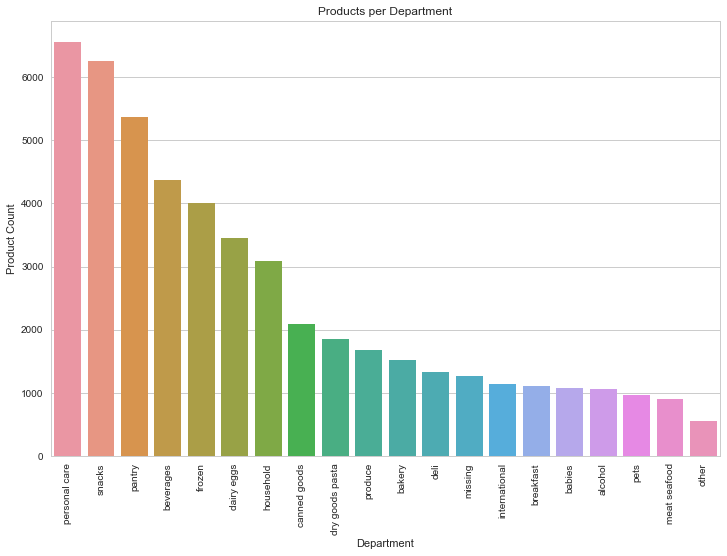

In [18]:
#Products per department
product_per_count = products_df['department'].value_counts().head(20)
plt.figure(figsize=(12,8))
sns.barplot(product_per_count.index, product_per_count.values)
plt.title("Products per Department")
plt.xlabel("Department")
plt.ylabel("Product Count")
plt.xticks(rotation='vertical')
plt.show()

###### How many orders per user?

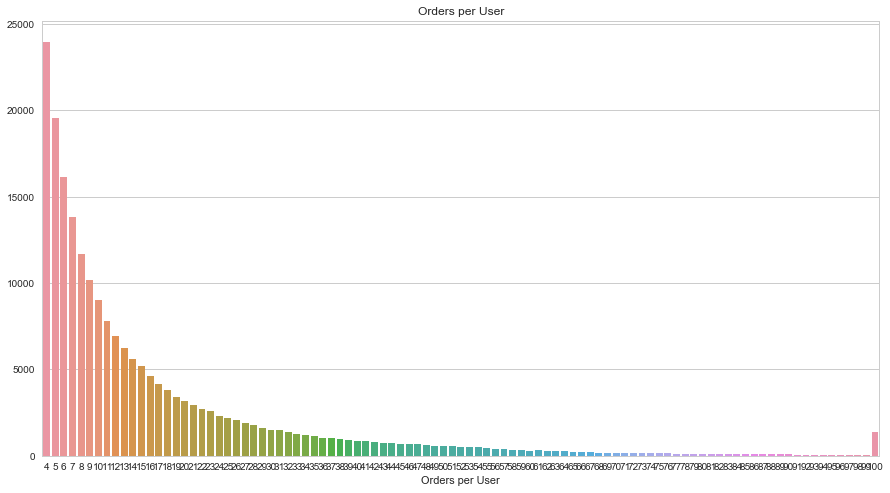

In [19]:
#Orders per user
plt.figure(figsize=(15,8))
sns.countplot(orders_df.user_id.value_counts())
plt.title("Orders per User")
plt.xlabel("Orders per User")
plt.ylabel("")

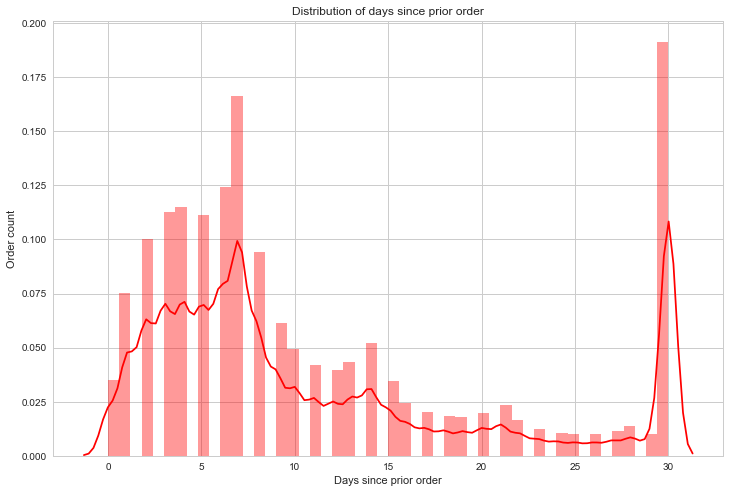

In [20]:
#Plot days since prior order to identify ordering patterns
plt.figure(figsize=(12,8))
sns.distplot(orders_df.days_since_prior_order.dropna(),color='red')
plt.title("Distribution of days since prior order")
plt.xlabel("Days since prior order")
plt.ylabel("Order count")

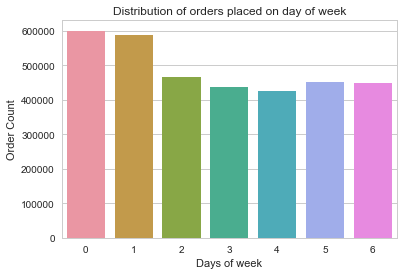

In [21]:
#Plot ordering pattern by day of week 
sns.countplot(orders_df.order_dow.dropna())
plt.title("Distribution of orders placed on day of week")
plt.xlabel("Days of week")
plt.ylabel("Order Count")

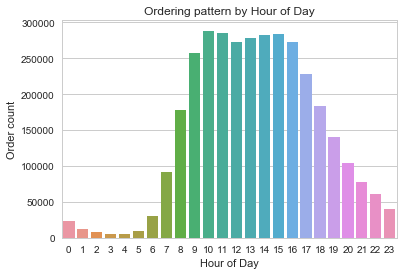

In [22]:
#Plot ordering pattern by hour of the day
sns.countplot(orders_df.order_hour_of_day.dropna())
plt.title("Ordering pattern by Hour of Day")
plt.xlabel("Hour of Day")
plt.ylabel("Order count")

In [23]:
#Merge in product names
order_products_prior_df=pd.merge(order_products_prior_df,products_df,on='product_id',how='left')
order_products_train_df=pd.merge(order_products_train_df,products_df,on='product_id',how='left')

In [24]:
#Concatenate prior orders and train orders
order_products_prior_df['eval_set']='prior'
order_products_train_df['eval_set']='train'
order_products_df=pd.concat([order_products_prior_df,order_products_train_df])

In [25]:
#Merge orders with order product dataset
orders_df=pd.merge(orders_df,order_products_df,on=['eval_set','order_id'],how='outer')

In [26]:
orders_df.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department
0,2539329,1,prior,1,2,8,NaN,196.0,1.0,0.0,Soda,77.0,7.0,soft drinks,beverages
1,2539329,1,prior,1,2,8,NaN,14084.0,2.0,0.0,Organic Unsweetened Vanilla Almond Milk,91.0,16.0,soy lactosefree,dairy eggs
2,2539329,1,prior,1,2,8,NaN,12427.0,3.0,0.0,Original Beef Jerky,23.0,19.0,popcorn jerky,snacks
3,2539329,1,prior,1,2,8,NaN,26088.0,4.0,0.0,Aged White Cheddar Popcorn,23.0,19.0,popcorn jerky,snacks
4,2539329,1,prior,1,2,8,NaN,26405.0,5.0,0.0,XL Pick-A-Size Paper Towel Rolls,54.0,17.0,paper goods,household


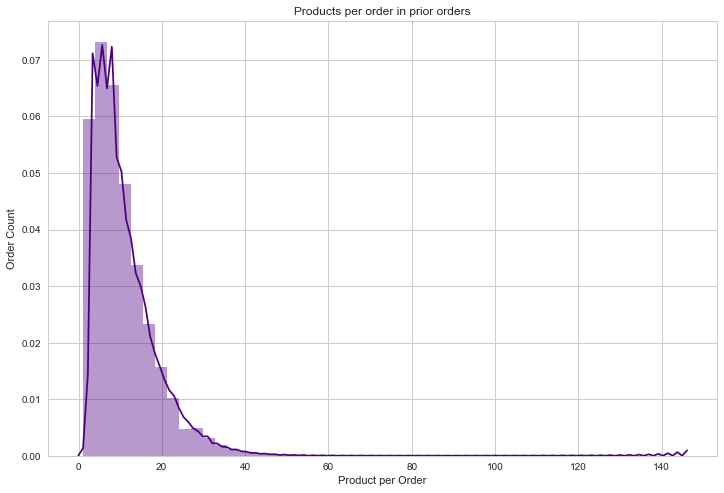

In [27]:
#Products per Order in prior dataset
plt.figure(figsize=(12,8))
sns.distplot(order_products_prior_df.order_id.value_counts(),color='indigo')
plt.title("Products per order in prior orders")
plt.xlabel("Product per Order")
plt.ylabel("Order Count")

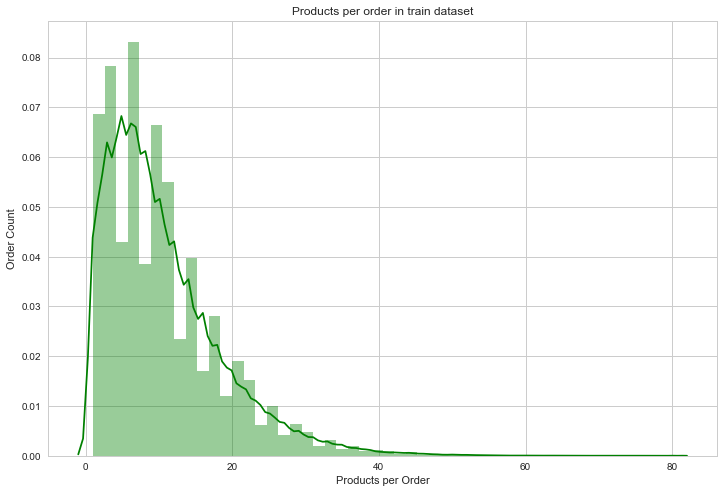

In [28]:
#Products per order in train dataset
plt.figure(figsize=(12,8))
sns.distplot(order_products_train_df.order_id.value_counts(),color='green')
plt.title("Products per order in train dataset")
plt.xlabel("Products per Order")
plt.ylabel("Order Count")

###### Most sold products

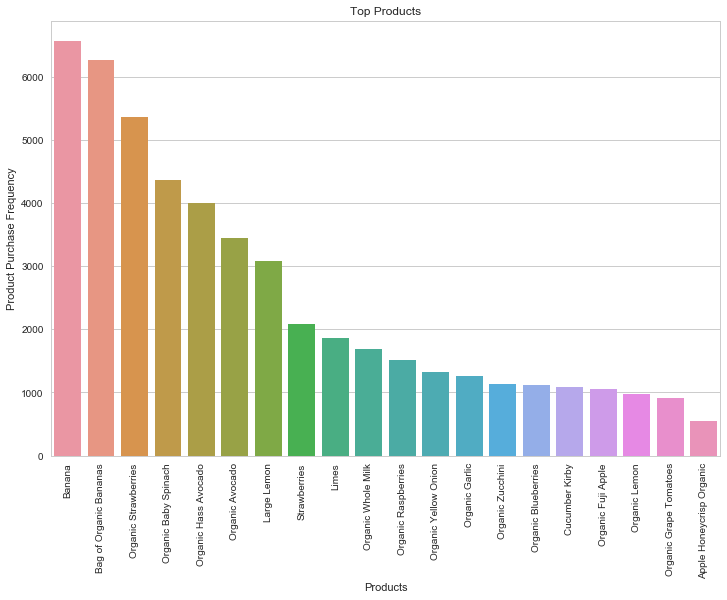

In [29]:
#Identify top products
product_count = orders_df['product_name'].value_counts().head(20)
plt.figure(figsize=(12,8))
sns.barplot(product_count.index, product_per_count.values)
plt.xticks(rotation='vertical')
plt.title("Top Products")
plt.xlabel("Products")
plt.ylabel("Product Purchase Frequency")
plt.show()

###### Most sold department

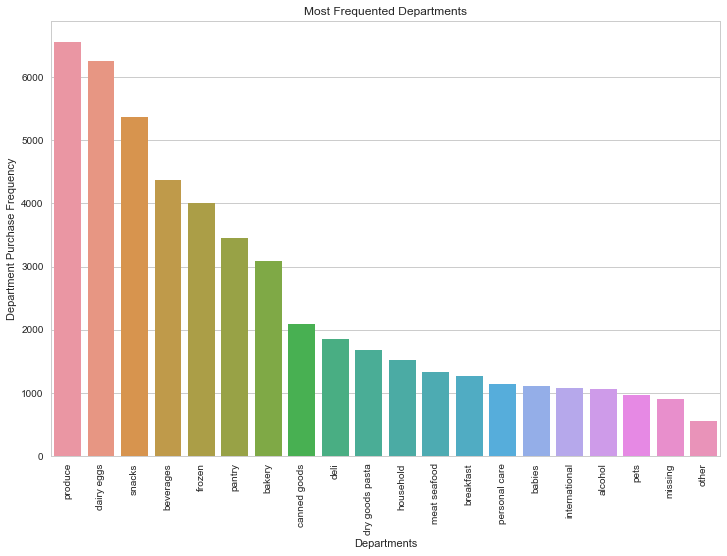

In [30]:
#Identify top departments
product_count = orders_df['department'].value_counts().head(20)
plt.figure(figsize=(12,8))
sns.barplot(product_count.index, product_per_count.values)
plt.xticks(rotation='vertical')
plt.title("Most Frequented Departments")
plt.xlabel("Departments")
plt.ylabel("Department Purchase Frequency")
plt.show()

###### Top reordered products

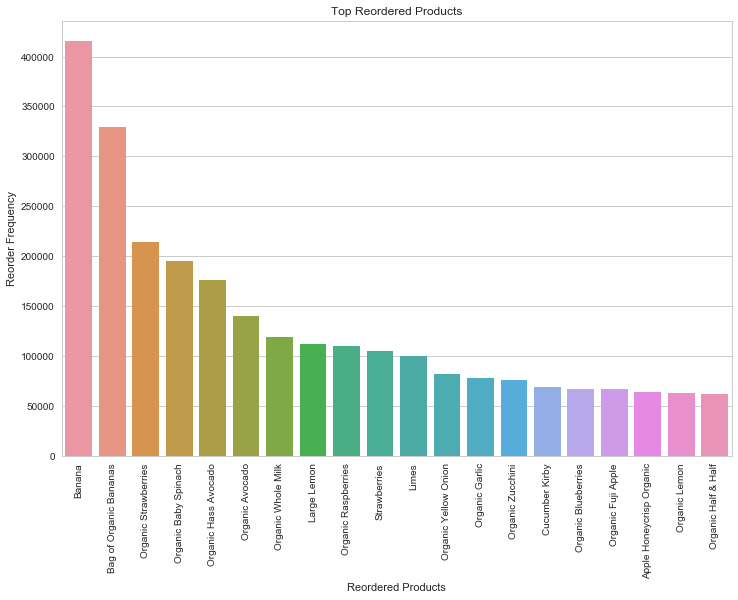

In [31]:
#Identify top reordered products
reordered_products = orders_df[orders_df.reordered==1].product_name.value_counts().head(20)
plt.figure(figsize=(12,8))
sns.barplot(reordered_products.index, reordered_products.values)
plt.xticks(rotation='vertical')
plt.title("Top Reordered Products")
plt.xlabel("Reordered Products")
plt.ylabel("Reorder Frequency")
plt.show()

###### Top reordered department

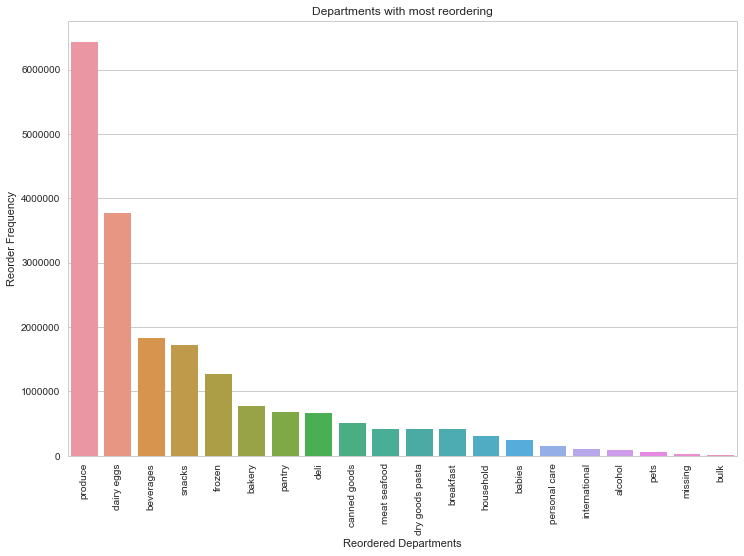

In [32]:
#Identify top reordered departments
reordered_department = orders_df[orders_df.reordered==1].department.value_counts().head(20)
plt.figure(figsize=(12,8))
sns.barplot(reordered_department.index, reordered_department.values)
plt.xticks(rotation='vertical')
plt.title("Departments with most reordering")
plt.xlabel("Reordered Departments")
plt.ylabel("Reorder Frequency")
plt.show()